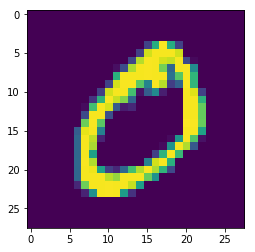

3


In [2]:
#利用识别图片
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[1,:,:])
plt.show()
print(x_train.ndim)

In [2]:
#张量转换为向量，第一维样本，第二维向量
import numpy as np
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)


In [3]:
x_train=x_train/255
x_test=x_test/255
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')


In [4]:
#输出label转换为 one of key encoding
import keras
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [5]:
#建立深度学习网络
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adagrad
model=Sequential()  #初始化神经网络
#输入层信息
#Dense（相连隐层的个数，激活函数，输入维度）全连接层 
model.add(Dense(100,activation='sigmoid',input_shape=(784,)))  
#minibatch  随机梯度下降每次输入的样本个数   batch_size=**
#隐层信息
model.add(Dense(50,activation='relu'))
#第二个隐含层
model.add(Dense(10,activation='softmax'))
#设置loss function, 优化算法，评价标准
model.compile(loss='categorical_crossentropy',optimizer=Adagrad(),metrics=['accuracy'])
#训练模型 epochs所需要大循环的次数
model.fit(x_train,y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test),verbose=1)
#模型准确率 verbose是否显示中间过程
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss：',score[0])
print('Accuracy：',score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.4002 - acc: 0.8923 - val_loss: 0.2672 - val_acc: 0.9235
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2535 - acc: 0.9266 - val_loss: 0.2319 - val_acc: 0.9317
Epoch 3/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2229 - acc: 0.9351 - val_loss: 0.2097 - val_acc: 0.9385
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2030 - acc: 0.9410 - val_loss: 0.1951 - val_acc: 0.9425
Epoch 5/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.1880 - acc: 0.9451 - val_loss: 0.1829 - val_acc: 0.9465
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1761 - acc: 0.9489 - val_loss: 0.1733 - val_acc: 0.9503
Epoch 